# Cooler tutorial on Blobel data

Walk through the tutorial available at https://github.com/open2c/cooler-binder/blob/master/cooler_api.ipynb applied to a sample data set from Zhang et al. *Nat. Comm.* (2021)

In [85]:
# Import the packages we will use
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py
import bbi
import scipy

import cooler
import cooltools
import cooltools.lib.plotting

# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-poster')
import numpy as np
import pandas as pd
import os, subprocess

# import open2c libraries
import bioframe

import cooler
import cooltools

In [121]:
params = {'axes.edgecolor': 'black',
                  'axes.facecolor':'white',
                  'axes.grid': False,
                  'axes.titlesize': 18,
                  'axes.titlepad' : 12,
                  'axes.labelsize': 18,
                  'legend.fontsize': 18,
                  'text.usetex': False,
                  'xtick.labelsize': 18,
                  'ytick.labelsize': 18,
                  'figure.figsize': [5.67, 4.76],
                  #'font.family': 'serif',
                  #'font.serif' : ["Computer Modern Roman"],
                  'mathtext.fontset': 'cm',
                  'xtick.bottom':True,
                  'xtick.top': False,
                  'xtick.direction': 'out',
                  'xtick.major.pad': 3,
                  'xtick.major.size': 4,
                  'xtick.minor.bottom': False,
                  'xtick.major.width': 1.0,
                  'ytick.left':True,
                  'ytick.right':False,
                  'ytick.direction':'out',
                  'ytick.major.pad': 3,
                  'ytick.major.size': 4,
                  'ytick.major.width': 1.0,
                  'ytick.minor.right':False,
                  'lines.linewidth':2}
plt.rcParams.update(params)
textwidth = 6.5

In [86]:
import bbi

In [87]:
%matplotlib inline

In [12]:
filepath = '/net/levsha/share/lab/zhang2021NatComm/coolers/coolers_library_group/120min_no_auxin.mm10.mapq_30.100.cool'

## The Cooler library

In [8]:
c = cooler.Cooler(filepath)

In [9]:
c.info

{'bin-size': 100,
 'bin-type': 'fixed',
 'creation-date': '2022-02-15T01:39:57.867354',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.5',
 'genome-assembly': 'mm10',
 'metadata': {},
 'nbins': 27255386,
 'nchroms': 22,
 'nnz': 325611500,
 'storage-mode': 'symmetric-upper',
 'sum': 395425030}

In [ ]:
c.chroms()[:]

In [ ]:
c.chromsizes

In [ ]:
c.bins()[:10]

In [ ]:
c.pixels()[:10]

In [ ]:
c.pixels(join=True)[:10]

In [ ]:
bins = c.bins()[:]
pix = c.pixels()[100:110]
pix

In [ ]:
cooler.annotate(pix, bins)

## Enter the matrix

In [ ]:
arr = c.matrix(balance=False)[0:1000, 0:1000]
arr.shape

In [ ]:
mat = c.matrix(balance=False, sparse=True)[1000:1200, 1000:1200]
mat

# Introduction to cooltools

In [88]:
import cooltools

In [122]:
tag = '120min_no_auxin'
filepath = f'/net/levsha/share/lab/zhang2021NatComm/coolers/coolers_library_group/{tag}.mm10.mapq_30.100.mcool'

In [17]:
# to print which resolutions are stored in the mcool, use list_coolers
cooler.fileops.list_coolers(filepath)

['/resolutions/100',
 '/resolutions/200',
 '/resolutions/500',
 '/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [37]:
### to load a cooler with a specific resolution use the following syntax:
clr = cooler.Cooler(filepath + '::resolutions/1000000')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

### to make a list of chromosome start/ends in bins:
chromstarts = []
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chrX', 'chrY', 'chrM'], binsize: 1000000
chr1 : (0, 196)
chr2 : (196, 379)
chr3 : (379, 540)
chr4 : (540, 697)
chr5 : (697, 849)
chr6 : (849, 999)
chr7 : (999, 1145)
chr8 : (1145, 1275)
chr9 : (1275, 1400)
chr10 : (1400, 1531)
chr11 : (1531, 1654)
chr12 : (1654, 1775)
chr13 : (1775, 1896)
chr14 : (1896, 2021)
chr15 : (2021, 2126)
chr16 : (2126, 2225)
chr17 : (2225, 2320)
chr18 : (2320, 2411)
chr19 : (2411, 2473)
chrX : (2473, 2645)
chrY : (2645, 2737)
chrM : (2737, 2738)


# Visualizing Hi-C matrices

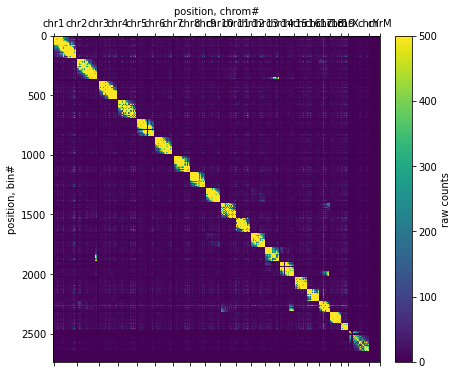

In [20]:
f, ax = plt.subplots(figsize=(7,6))
im = ax.matshow((clr.matrix(balance=False)[:]),vmax=500);
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.set(xticks=chromstarts, xticklabels=clr.chromnames,
       xlabel='position, chrom#', ylabel='position, bin#')
ax.xaxis.set_label_position('top')

In [25]:
# to plot ticks in terms of megabases we use the EngFormatter
# https://matplotlib.org/gallery/api/engineering_formatter.html
from matplotlib.ticker import EngFormatter
from matplotlib.colors import LogNorm

bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=50_000)

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

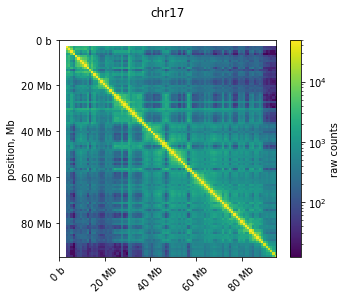

In [27]:
fig, ax = plt.subplots()
im = ax.matshow(
    clr.matrix(balance=False).fetch('chr17'),
    norm=norm,
    extent=(0,clr.chromsizes['chr17'], clr.chromsizes['chr17'], 0)
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title('chr17', y=1.08)
ax.set_ylabel('position, Mb')
format_ticks(ax)

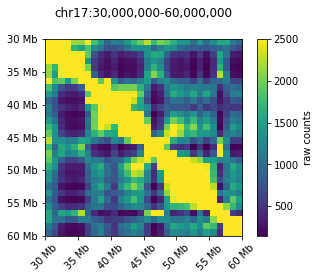

In [23]:
fig, ax = plt.subplots()
start, end = 30_000_000, 60_000_000
region = ('chr17', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    vmax=2500,
    extent=(start, end, end, start)
);
ax.set_title(f'chr17:{start:,}-{end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()

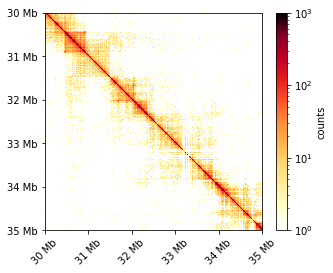

In [36]:
import cooltools.lib.plotting

clr_10kb = cooler.Cooler(filepath + '::resolutions/10000')
start, end = 30_000_000, 35_000_000
region = f'chr17:{start:,}-{end:,}'
extents = (start, end, end, start)
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots()
im = ax.matshow(
    clr_10kb.matrix(balance=False).fetch(region),
    cmap='fall',
    norm=norm,
    extent=extents
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='counts')
format_ticks(ax)

## Balancing

- Weights assined to different bins (biases for normalization). Stored in weight column of clr.bins()
- Low coverage bins assigned a weight of np.nan
- Can interpolate over such bins for visualization / analysis. Can also moothe matrices using adaptive coarsegrain

/home/dkannan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  
/home/dkannan/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1618: RuntimeWarning: invalid value encountered in less_equal
  super().autoscale_None(np.ma.array(A, mask=(A <= 0)))
/home/dkannan/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1618: RuntimeWarning: invalid value encountered in less_equal
  super().autoscale_None(np.ma.array(A, mask=(A <= 0)))


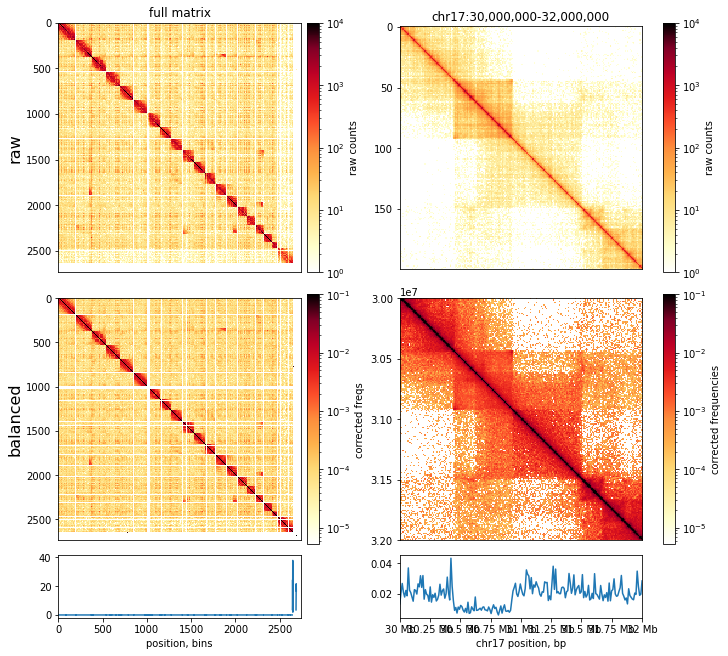

In [38]:
### plot the raw and corrected data in logscale ###
from mpl_toolkits.axes_grid import make_axes_locatable

plt_width=4
f, axs = plt.subplots(
    figsize=( plt_width+plt_width+2, plt_width+plt_width+1),
    ncols=4,
    nrows=3,
    gridspec_kw={'height_ratios':[4,4,1],"wspace":0.01,'width_ratios':[1,.05,1,.05]},
    constrained_layout=True
)

norm = LogNorm(vmax=0.1)
norm_raw = LogNorm(vmin=1, vmax=10_000)

ax = axs[0,0]
im = ax.matshow(
    clr.matrix(balance=False)[:],
    norm=norm_raw,
    cmap='fall',
    aspect='auto'
);
ax.xaxis.set_visible(False)
ax.set_title('full matrix')
ax.set_ylabel('raw', fontsize=16)

cax = axs[0,1]
plt.colorbar(im, cax=cax, label='raw counts')

ax = axs[1,0]
im = ax.matshow(
    clr.matrix()[:],
    norm=norm,
    cmap='fall',
);
ax.xaxis.set_visible(False)
ax.set_ylabel('balanced', fontsize=16)

cax = axs[1,1]
plt.colorbar(im, cax=cax, label='corrected freqs')

ax1 = axs[2,0]
weights = clr.bins()[:]['weight'].values
ax1.plot(weights)
ax1.set_xlim([0, len(clr.bins()[:])])
ax1.set_xlabel('position, bins')

ax1 = axs[2,1]
ax1.set_visible(False)



start = 30_000_000
end = 32_000_000
region = ('chr17', start, end)

ax = axs[0,2]
im = ax.matshow(
        clr_10kb.matrix(balance=False).fetch(region),
    norm=norm_raw,
    cmap='fall'
);
ax.set_title(f'chr17:{start:,}-{end:,}')
ax.xaxis.set_visible(False)

cax = axs[0,3]
plt.colorbar(im, cax=cax, label='raw counts');

ax = axs[1,2]
im = ax.matshow(
    clr_10kb.matrix().fetch(region),
    norm=norm,
    cmap='fall',
    extent=(start, end, end, start)
);
ax.xaxis.set_visible(False)

cax = axs[1,3]
plt.colorbar(im, cax=cax, label='corrected frequencies');

ax1 = axs[2,2]
weights = clr_10kb.bins().fetch(region)['weight'].values
ax1.plot(
    np.linspace(start, end, len(weights)),
    weights
)
format_ticks(ax1, y=False, rotate=False)
ax1.set_xlim(start, end);
ax1.set_xlabel('chr17 position, bp')

ax1 = axs[2,3]
ax1.set_visible(False)

/home/dkannan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'coverage ratio')

/home/dkannan/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1618: RuntimeWarning: invalid value encountered in less_equal
  super().autoscale_None(np.ma.array(A, mask=(A <= 0)))


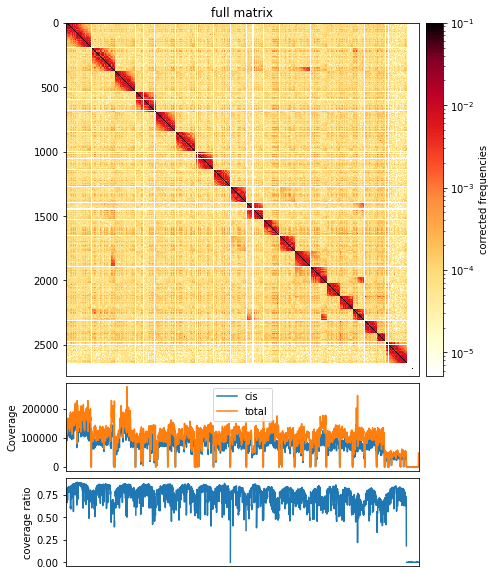

In [39]:
cis_coverage, tot_coverage = cooltools.coverage(clr)

f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmax=0.1)

im = ax.matshow(
    clr.matrix()[:],
    norm=norm,
    cmap='fall'
);
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_title('full matrix')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("bottom", size="25%", pad=0.1, sharex=ax)
weights = clr.bins()[:]['weight'].values
ax1.plot( cis_coverage, label='cis')
ax1.plot( tot_coverage, label='total')
ax1.set_xlim([0, len(clr.bins()[:])])
ax1.set_ylabel('Coverage')
ax1.legend()
ax1.set_xticks([])

ax2 = divider.append_axes("bottom", size="25%", pad=0.1, sharex=ax)
ax2.plot( cis_coverage/ tot_coverage)
ax2.set_xlim([0, len(clr.bins()[:])])
ax2.set_ylabel('coverage ratio')

/home/dkannan/anaconda3/lib/python3.7/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur


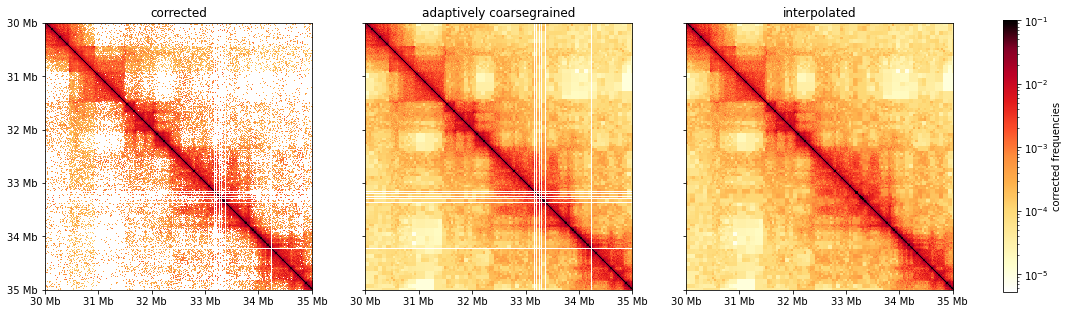

In [41]:
from cooltools.lib.numutils import adaptive_coarsegrain, interp_nan

start = 30_000_000
end = 35_000_000
region = ('chr17', start, end)
extents = (start, end, end, start)

cg = adaptive_coarsegrain(clr_10kb.matrix(balance=True).fetch(region),
                              clr_10kb.matrix(balance=False).fetch(region),
                              cutoff=3, max_levels=8)

cgi = interp_nan(cg)

f, axs = plt.subplots(
    figsize=(18,5),
    nrows=1,
    ncols=3,
    sharex=True, sharey=True)

ax = axs[0]
im = ax.matshow(clr_10kb.matrix(balance=True).fetch(region), cmap='fall', norm=norm, extent=extents)
ax.set_title('corrected')

ax = axs[1]
im2 = ax.matshow(cg, cmap='fall', norm=norm, extent=extents)
ax.set_title(f'adaptively coarsegrained')

ax = axs[2]
im3 = ax.matshow(cgi, cmap='fall', norm=norm, extent=extents)
ax.set_title(f'interpolated')

for ax in axs:
    format_ticks(ax, rotate=False)

plt.colorbar(im3, ax=axs, fraction=0.046, label='corrected frequencies')

# Contact scaling

In [11]:
# Load a Hi-C map at a 1kb resolution from a cooler file.
resolution = 1000 # note this might be slightly slow on a laptop
                  # and could be lowered to 10kb for increased speed
clr = cooler.Cooler(filepath + '::/resolutions/'+str(resolution))

In [12]:
chromsizes = pd.read_csv('/home/dkannan/mm10/mm10.chrom.sizes', sep='\t')


In [13]:
# Use bioframe to fetch the genomic features from the UCSC.
mm10_chromsizes = bioframe.fetch_chromsizes('mm10')
mm10_cens = bioframe.fetch_centromeres('mm10')
# create a view with chromosome arms using chromosome sizes and definition of centromeres
mm10_arms = bioframe.make_chromarms(mm10_chromsizes,  mm10_cens)

# select only those chromosomes available in cooler
mm10_arms = mm10_arms[mm10_arms.chrom.isin(clr.chromnames)].reset_index(drop=True)
mm10_arms


,chrom,start,end,name
0,chr1,0,195471971,chr1_p
1,chr2,0,182113224,chr2_p
2,chr3,0,160039680,chr3_p
3,chr4,0,156508116,chr4_p
4,chr5,0,151834684,chr5_p
5,chr6,0,149736546,chr6_p
6,chr7,0,145441459,chr7_p
7,chr8,0,129401213,chr8_p
8,chr9,0,124595110,chr9_p
9,chr10,0,130694993,chr10_p


# Compartments and Saddle Plots

In [90]:
clr_100kb = cooler.Cooler(filepath + '::resolutions/100000')
clr_100kb.bins().shape

(27269,)

In [91]:
bins = clr_100kb.bins()[:]
mm10_genome = bioframe.load_fasta('/home/dkannan/mm10/mm10.fa');
## note the next command may require installing pysam
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm10_genome)
gc_cov.to_csv('mm10_gc_cov_100kb.tsv',index=False,sep='\t')

In [92]:
display(gc_cov[gc_cov['chrom']=='chrY'])

,chrom,start,end,GC
26350,chrY,0,100000,NaN
26351,chrY,100000,200000,0.384244
26352,chrY,200000,300000,0.381020
26353,chrY,300000,400000,0.382066
26354,chrY,400000,500000,NaN
...,...,...,...,...
27263,chrY,91300000,91400000,NaN
27264,chrY,91400000,91500000,NaN
27265,chrY,91500000,91600000,NaN
27266,chrY,91600000,91700000,NaN


In [93]:
view_df = pd.DataFrame({'chrom': clr_100kb.chromnames,
                        'start': 0,
                        'end': clr_100kb.chromsizes.values,
                        'name': clr_100kb.chromnames}
                      )
display(view_df)

,chrom,start,end,name
0,chr1,0,195471971,chr1
1,chr2,0,182113224,chr2
2,chr3,0,160039680,chr3
3,chr4,0,156508116,chr4
4,chr5,0,151834684,chr5
5,chr6,0,149736546,chr6
6,chr7,0,145441459,chr7
7,chr8,0,129401213,chr8
8,chr9,0,124595110,chr9
9,chr10,0,130694993,chr10


In [54]:
view_df = pd.DataFrame({'chrom': [clr_100kb.chromnames[i] for i in [1, 16]],
                        'start': 0,
                        'end': [clr_100kb.chromsizes.values[i] for i in [1, 16]],
                        'name': [clr_100kb.chromnames[i] for i in [1, 16]]}
                      )
display(view_df)

,chrom,start,end,name
0,chr2,0,182113224,chr2
1,chr17,0,94987271,chr17


In [116]:
# obtain first 3 eigenvectors
cis_eigs = cooltools.eigs_cis(
                        clr_100kb,
                        gc_cov,
                        view_df=view_df,
                        n_eigs=3,
                        )

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]

In [67]:
display(eigenvector_track)


,chrom,start,end,E1
0,chr1,0,100000,NaN
1,chr1,100000,200000,NaN
2,chr1,200000,300000,NaN
3,chr1,300000,400000,NaN
4,chr1,400000,500000,NaN
...,...,...,...,...
27264,chrY,91400000,91500000,NaN
27265,chrY,91500000,91600000,NaN
27266,chrY,91600000,91700000,NaN
27267,chrY,91700000,91744698,NaN


In [63]:
#df = eigenvector_track.dropna()
df = eigenvector_track
#df.loc[22106:(22196+500)]
for name, group in df.groupby('chrom'):
    num_entries = group.shape[0]
    num_nans = group['E1'].isna().sum()
    print(f'{num_entries}, {num_nans}')

1955, 47
1822, 77
1601, 54
1566, 116
1519, 86
1498, 56
1455, 192
1295, 64
1246, 44
1307, 76
1221, 39
1202, 115
1205, 94
1250, 147
1041, 39
983, 37
950, 87
908, 33
615, 48
1711, 282
918, 918
1, 1


In [95]:
#Filter out whole chromosomes that have NaNs
def filter_Nans(eigdf, clr):
    """ Eigdf and clr are the whole genome eigenvector tracks / coolers. 
    We will select out chromosomes that are fully NaN and return a viewdf that 
    excludes these chromosomes. This view then can be used for downstream analysis."""
    excluded_chroms = []
    for name, group in eigdf.groupby('chrom'):
        num_entries = group.shape[0]
        num_nans = group['E1'].isna().sum()
        if num_nans == num_entries:
            #exclude this chromosome
            excluded_chroms.append(name)
    #construct view df that excludes these chroms
    indices = [clr.chromnames.index(chrom) for chrom in excluded_chroms]
    num_chroms = len(clr.chromnames)
    view_df = pd.DataFrame({'chrom': [clr.chromnames[i] for i in range(num_chroms) if i not in indices],
                        'start': 0,
                        'end': [clr.chromsizes.values[i] for i in range(num_chroms) if i not in indices],
                        'name': [clr.chromnames[i] for i in range(num_chroms) if i not in indices]}
                      )
    return view_df

In [117]:
view_df = filter_Nans(eigenvector_track, clr_100kb)
df = eigenvector_track
display(view_df)

,chrom,start,end,name
0,chr1,0,195471971,chr1
1,chr2,0,182113224,chr2
2,chr3,0,160039680,chr3
3,chr4,0,156508116,chr4
4,chr5,0,151834684,chr5
5,chr6,0,149736546,chr6
6,chr7,0,145441459,chr7
7,chr8,0,129401213,chr8
8,chr9,0,124595110,chr9
9,chr10,0,130694993,chr10


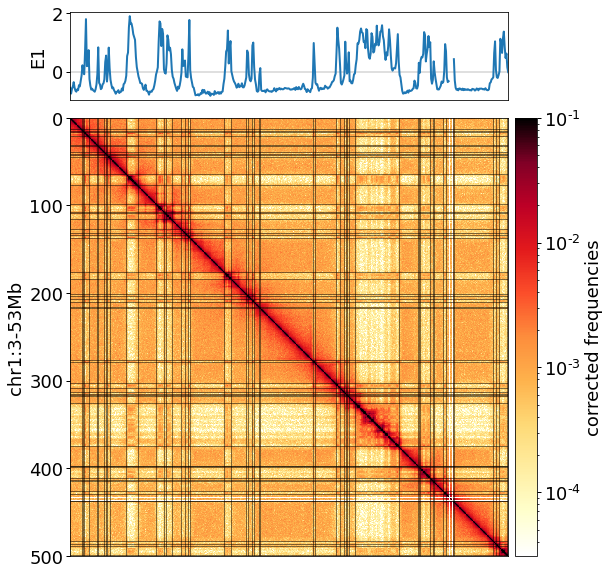

In [123]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmax=0.1)
start = 3_000_000
end = 53_100_000
region = ('chr1', start, end)

im = ax.matshow(
    clr_100kb.matrix().fetch(region)[:],
    norm=norm,
    cmap='fall'
);
plt.axis([0,500,500,0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_ylabel('chr1:3-53Mb')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = clr_100kb.bins().fetch('chr2')[:]['weight'].values
ax1.plot([0,500],[0,0],'k',lw=0.25)
ax1.plot(df.loc[30:(30+500), 'E1'].values, label='E1')

ax1.set_ylabel('E1')
ax1.set_xticks([]);


for i in np.where(np.diff( (df.loc[30:(30+500), 'E1'].values>0).astype(int)))[0]:
    ax.plot([0, 500],[i,i],'k',lw=0.5)
    ax.plot([i,i],[0, 500],'k',lw=0.5)

plt.savefig(f'plots/{tag}_chr1_3-53Mb_contact_E1.pdf')

## Saddle plots

In [98]:
cvd = cooltools.expected_cis(
        clr=clr_100kb,
        view_df=view_df,
)
Q_LO = 0.025 # ignore 2.5% of genomic bins with the lowest E1 values
Q_HI = 0.975 # ignore 2.5% of genomic bins with the highest E1 values
N_GROUPS = 38 # divide remaining 95% of the genome into 38 equisized groups, 2.5% each

In [99]:
interaction_sum, interaction_count =  cooltools.saddle(
        clr_100kb,
        cvd,
        eigenvector_track,
        'cis',
        n_bins=N_GROUPS,
        qrange=(Q_LO,Q_HI),
        view_df=view_df
)

In [100]:
import warnings
from cytoolz import merge

def saddleplot(
    track,
    saddledata,
    n_bins,
    vrange=None,
    qrange=(0.0, 1.0),
    cmap="coolwarm",
    scale="log",
    vmin=0.5,
    vmax=2,
    color=None,
    title=None,
    xlabel=None,
    ylabel=None,
    clabel=None,
    fig=None,
    fig_kws=None,
    heatmap_kws=None,
    margin_kws=None,
    cbar_kws=None,
    subplot_spec=None,
):
    """
    Generate a saddle plot.
    Parameters
    ----------
    track : pd.DataFrame
        See cooltools.digitize() for details.
    saddledata : 2D array-like
        Saddle matrix produced by `make_saddle`. It will include 2 flanking
        rows/columns for outlier signal values, thus the shape should be
        `(n+2, n+2)`.
    cmap : str or matplotlib colormap
        Colormap to use for plotting the saddle heatmap
    scale : str
        Color scaling to use for plotting the saddle heatmap: log or linear
    vmin, vmax : float
        Value limits for coloring the saddle heatmap
    color : matplotlib color value
        Face color for margin bar plots
    fig : matplotlib Figure, optional
        Specified figure to plot on. A new figure is created if none is
        provided.
    fig_kws : dict, optional
        Passed on to `plt.Figure()`
    heatmap_kws : dict, optional
        Passed on to `ax.imshow()`
    margin_kws : dict, optional
        Passed on to `ax.bar()` and `ax.barh()`
    cbar_kws : dict, optional
        Passed on to `plt.colorbar()`
    subplot_spec : GridSpec object
        Specify a subregion of a figure to using a GridSpec.
    Returns
    -------
    Dictionary of axes objects.
    """

#     warnings.warn(
#         "Generating a saddleplot will be deprecated in future versions, "
#         + "please see https://github.com/open2c_examples for examples on how to plot saddles.",
#         DeprecationWarning,
#     )

    from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
    from matplotlib.colors import Normalize, LogNorm
    from matplotlib import ticker
    import matplotlib.pyplot as plt

    class MinOneMaxFormatter(ticker.LogFormatter):
        def set_locs(self, locs=None):
            self._sublabels = set([vmin % 10 * 10, vmax % 10, 1])

        def __call__(self, x, pos=None):
            if x not in [vmin, 1, vmax]:
                return ""
            else:
                return "{x:g}".format(x=x)

    track_value_col = track.columns[3]
    track_values = track[track_value_col].values

    digitized_track, binedges = cooltools.digitize(
        track, n_bins, vrange=vrange, qrange=qrange
    )
    x = digitized_track[digitized_track.columns[3]].values.astype(int).copy()
    x = x[(x > -1) & (x < len(binedges) + 1)]
    hist = np.bincount(x, minlength=len(binedges) + 1)
    if qrange is not None:
        lo, hi = qrange
        binedges = np.linspace(lo, hi, n_bins + 1)

    # Histogram and saddledata are flanked by outlier bins
    n = saddledata.shape[0]
    X, Y = np.meshgrid(binedges, binedges)
    C = saddledata
    if (n - n_bins) == 2:
        C = C[1:-1, 1:-1]
        hist = hist[1:-1]

    # Layout
    if subplot_spec is not None:
        GridSpec = partial(GridSpecFromSubplotSpec, subplot_spec=subplot_spec)
    grid = {}
    gs = GridSpec(
        nrows=3,
        ncols=3,
        width_ratios=[0.2, 1, 0.1],
        height_ratios=[0.2, 1, 0.1],
        wspace=0.05,
        hspace=0.05,
    )

    # Figure
    if fig is None:
        fig_kws_default = dict(figsize=(5, 5))
        fig_kws = merge(fig_kws_default, fig_kws if fig_kws is not None else {})
        fig = plt.figure(**fig_kws)

    # Heatmap
    if scale == "log":
        norm = LogNorm(vmin=vmin, vmax=vmax)
    elif scale == "linear":
        norm = Normalize(vmin=vmin, vmax=vmax)
    else:
        raise ValueError("Only linear and log color scaling is supported")

    grid["ax_heatmap"] = ax = plt.subplot(gs[4])
    heatmap_kws_default = dict(cmap="coolwarm", rasterized=True)
    heatmap_kws = merge(
        heatmap_kws_default, heatmap_kws if heatmap_kws is not None else {}
    )
    img = ax.pcolormesh(X, Y, C, norm=norm, **heatmap_kws)
    plt.gca().yaxis.set_visible(False)

    # Margins
    margin_kws_default = dict(edgecolor="k", facecolor=color, linewidth=1)
    margin_kws = merge(margin_kws_default, margin_kws if margin_kws is not None else {})
    # left margin hist
    grid["ax_margin_y"] = plt.subplot(gs[3], sharey=grid["ax_heatmap"])
    plt.barh(
        binedges[:-1], height=np.diff(binedges), width=hist, align="edge", **margin_kws
    )
    plt.xlim(plt.xlim()[1], plt.xlim()[0])  # fliplr
    plt.ylim(hi, lo)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.gca().xaxis.set_visible(False)
    # top margin hist
    grid["ax_margin_x"] = plt.subplot(gs[1], sharex=grid["ax_heatmap"])
    plt.bar(
        binedges[:-1], width=np.diff(binedges), height=hist, align="edge", **margin_kws
    )
    plt.xlim(lo, hi)
    # plt.ylim(plt.ylim())  # correct
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)

    # Colorbar
    grid["ax_cbar"] = plt.subplot(gs[5])
    cbar_kws_default = dict(fraction=0.8, label=clabel or "")
    cbar_kws = merge(cbar_kws_default, cbar_kws if cbar_kws is not None else {})
    if scale == "linear" and vmin is not None and vmax is not None:
        grid["cbar"] = cb = plt.colorbar(img, **cbar_kws)
        # cb.set_ticks(np.arange(vmin, vmax + 0.001, 0.5))
        # # do linspace between vmin and vmax of 5 segments and trunc to 1 decimal:
        decimal = 10
        nsegments = 5
        cd_ticks = np.trunc(np.linspace(vmin, vmax, nsegments) * decimal) / decimal
        cb.set_ticks(cd_ticks)
    else:
        grid["cbar"] = cb = plt.colorbar(img, format=MinOneMaxFormatter(), **cbar_kws)
        cb.ax.yaxis.set_minor_formatter(MinOneMaxFormatter())

    # extra settings
    grid["ax_heatmap"].set_xlim(lo, hi)
    grid["ax_heatmap"].set_ylim(hi, lo)
    plt.grid(False)
    plt.axis("off")
    if title is not None:
        grid["ax_margin_x"].set_title(title)
    if xlabel is not None:
        grid["ax_heatmap"].set_xlabel(xlabel)
    if ylabel is not None:
        grid["ax_margin_y"].set_ylabel(ylabel)

    return grid

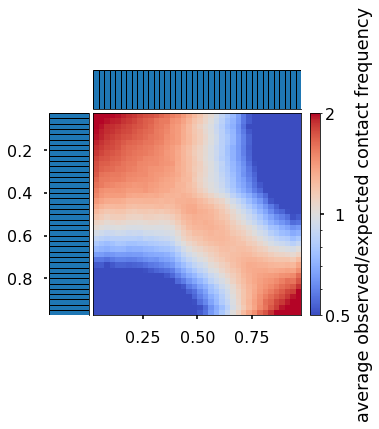

In [101]:
saddleplot(eigenvector_track,
           interaction_sum/interaction_count,
           N_GROUPS,
           qrange=(Q_LO,Q_HI),
           cbar_kws={'label':'average observed/expected contact frequency'}
          );

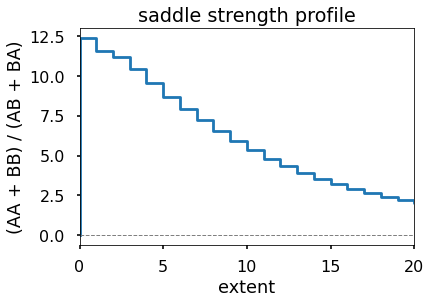

In [111]:
from cooltools.api.saddle import saddle_strength
# at extent=0, this reduces to ((S/C)[0,0] + (S/C)[-1,-1]) / (2*(S/C)[-1,0])

x = np.arange(N_GROUPS + 2)

plt.step(x, saddle_strength(interaction_sum, interaction_count), where='pre')

plt.xlabel('extent')
plt.ylabel('(AA + BB) / (AB + BA)')
plt.title('saddle strength profile')
plt.axhline(0, c='grey', ls='--', lw=1) # Q: is there a reason this is 0 not 1?
plt.xlim(0, len(x)//2); # Q: is this less intuitive than showing for all x, as it converges to no difference (i.e. 1)?


In [ ]:
interaction_sum.shape

# Load in Chip-Seq data and correlate to compartmentalization

In [102]:
chipseq0h = "/net/levsha/share/lab/zhang2021NatComm/ChiP/GSM5133011_PolII-0h-A.rep1.bw"

In [6]:
RNApolII = bioframe.read_bigwig(chipseq0h, chrom='chr17')

In [7]:
RNApolII

,chrom,start,end,value
0,chr17,0,3000094,0.00000
1,chr17,3000094,3000118,0.00000
2,chr17,3000118,3000141,0.00000
3,chr17,3000141,3000178,0.00000
4,chr17,3000178,3000196,0.00000
...,...,...,...,...
2010624,chr17,95272340,95272366,0.01847
2010625,chr17,95272366,95272508,0.12678
2010626,chr17,95272508,95272534,0.01847
2010627,chr17,95272534,95272599,0.00000


In [15]:
def bin_bigwig_approx(f, binsize, chromsizes):
    chromosomes = chromsizes.index.tolist()
    f = bbi.open(path)
    out = []
    for chrom in chromsizes:
        clen_rounded = int(np.ceil(chromsizes[chrom] / binsize)) * binsize
        n_bins = clen_rounded // binsize
        try:
            x = f.fetch(path, chrom, 0, clen_rounded, bins=n_bins)
        except KeyError:
            out.append( np.full(n_bins, np.nan) )
    return np.concatenate(out)


def bin_bigwig_exact(f, binsize, chromsizes):
    chromosomes = chromsizes.index.tolist()
    f = bbi.open(path)
    out = []
    for chrom in chromsizes:
        clen_rounded = int(np.ceil(chromsizes[chrom] / binsize)) * binsize
        try:
            x = f.fetch(path, chrom, 0, clen_rounded)
            out.append( np.nanmean(x.reshape(-1, binsize), axis=1) )
        except KeyError:
            out.append( np.full(clen_rounded//binsize, np.nan) )
    return np.concatenate(out)


chromsizes = mm10_chromsizes
binsize = 50_000
bigwig_path = chipseq0h

df = bioframe.binnify(chromsizes, binsize)
with bbi.open(bigwig_path) as f:
    df[name] = bin_bigwig_approx(f, binsize, chromsizes)

NameError: name 'path' is not defined

In [103]:
bins = clr_100kb.bins()[:]
chr1_bins = bins.loc[bins['chrom']=='chr1']
chr1_bins_idx = chr1_bins.index
clr_100kb.bins().fetch('chr1')

,chrom,start,end,weight
0,chr1,0,100000,NaN
1,chr1,100000,200000,NaN
2,chr1,200000,300000,NaN
3,chr1,300000,400000,NaN
4,chr1,400000,500000,NaN
...,...,...,...,...
1950,chr1,195000000,195100000,0.007369
1951,chr1,195100000,195200000,0.006204
1952,chr1,195200000,195300000,0.007590
1953,chr1,195300000,195400000,NaN


In [104]:
chr1_end = mm10_chromsizes['chr1']

In [105]:
with bbi.open(chipseq0h) as f:
    chr1_track = pd.Series(f.fetch('chr1', 0, chr1_end, bins=len(chr1_bins_idx)), index=chr1_bins_idx)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00129676, 0.01900293, 0.02399049, 0.03377608,
       0.02841727, 0.03668263, 0.02860715, 0.03612952, 0.02715214,
       0.02572326, 0.03154067, 0.03446783, 0.02868643, 0.02703818,
       0.0289969 , 0.02988216, 0.03388792, 0.04040358, 0.0550876 ,
       0.0548509 , 0.03907285, 0.0344784 , 0.03314282, 0.03373873,
       0.02816658, 0.02206565, 0.02608786, 0.02694451, 0.0268145 ,
       0.03342938, 0.03692157, 0.03435847, 0.03448597, 0.03929023,
       0.03341353, 0.03050681, 0.03224101, 0.03281979, 0.03260827,
       0.0321793 , 0.03394529, 0.04021379, 0.03548821, 0.0236021 ,
       0.03401357, 0.02861056, 0.02116909, 0.02338435, 0.02689

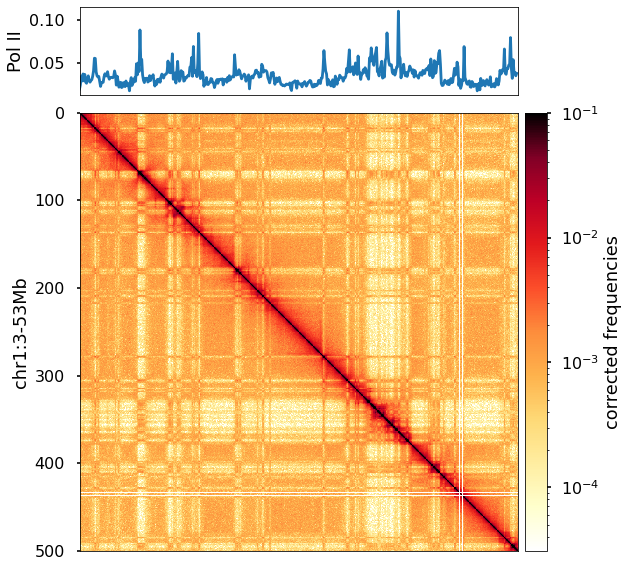

In [106]:
f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmax=0.1)
start = 3_000_000
end = 53_100_000
region = ('chr1', start, end)

im = ax.matshow(
    clr_100kb.matrix().fetch(region)[:],
    norm=norm,
    cmap='fall'
);
plt.axis([0,500,500,0])


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_ylabel('chr1:3-53Mb')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
#ax1.plot([0,500],[0,0],'k',lw=0.25)
ax1.plot(chr1_track[30:(30+500)].values, label='PolII ChiP')

ax1.set_ylabel('Pol II')
ax1.set_xticks([]);

In [84]:
df.loc[30:(30+500), 'E1'].values

array([-0.55612965, -0.75619781, -0.5980227 , -0.51173332, -0.36071204,
       -0.54911536, -0.65812452, -0.68775911, -0.60923012, -0.63637251,
       -0.46482242, -0.50781752, -0.32647493, -0.13133607,  0.21758329,
        0.00664451, -0.09164695,  0.72902285,  1.8006361 ,  0.18754849,
        0.19867662,  0.73658583, -0.25242281, -0.48101428, -0.61688815,
       -0.58464532, -0.63283662, -0.65956343, -0.68944073, -0.6034427 ,
       -0.44198048, -0.09100417,  0.83280003, -0.38588668, -0.44219142,
       -0.6016585 , -0.56992565, -0.4377049 , -0.40173798, -0.26808188,
        0.32927593,  0.55015191, -0.34127703,  0.01357865,  0.82368988,
        0.12392247, -0.27968127, -0.44906029, -0.57367954, -0.54353096,
       -0.63415976, -0.69165376, -0.75900842, -0.69462827, -0.68654304,
       -0.63687252, -0.73402159, -0.69936526, -0.69102212, -0.57928559,
       -0.64961826, -0.43244155, -0.40000563, -0.31890259, -0.14115308,
        0.5333939 ,  0.65293851,  1.51741158,  1.90195997,  1.64

In [108]:
corrdf = pd.DataFrame()
corrdf['E1'] = df.loc[30:(30+500), 'E1'].values[:-1]
corrdf['RNApolII'] = chr1_track[30:(30+500)].values
corrdf = corrdf.dropna()
display(corrdf)

,E1,RNApolII
0,-0.556130,0.019003
1,-0.756198,0.023990
2,-0.598023,0.033776
3,-0.511733,0.028417
4,-0.360712,0.036683
...,...,...
495,1.372179,0.053410
496,0.845481,0.038324
497,0.467999,0.038538
498,0.618258,0.034531


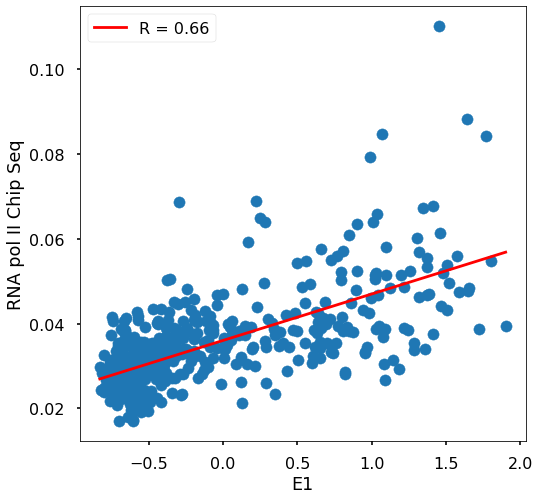

In [112]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(corrdf['E1'], corrdf['RNApolII'])
result = scipy.stats.linregress(corrdf['E1'].values, corrdf['RNApolII'].values)
m = result.slope
r = result.rvalue
xvals = np.linspace(corrdf['E1'].min(), corrdf['E1'].max(), 1000)
ax.plot(xvals, m*xvals + result.intercept, color='red', label=f'R = {r:.2f}')
plt.xlabel('E1')
plt.ylabel('RNA pol II Chip Seq')
plt.legend()